# Green Taxi Trip Analysis

## Data Loading

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!if not exist ".\data\" mkdir data

!curl -o ".\data\green_tripdata_2024-01.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet"
!curl -o ".\data\green_tripdata_2024-02.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet"
!curl -o ".\data\green_tripdata_2024-03.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-03.parquet"
!curl -o ".\data\green_tripdata_2024-04.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-04.parquet"
!curl -o ".\data\green_tripdata_2024-05.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-05.parquet"
!curl -o ".\data\green_tripdata_2024-06.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-06.parquet"
!curl -o ".\data\green_tripdata_2024-07.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-07.parquet"

!curl -o ".\data\zone_lookup.csv" "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  8 1330k    8  110k    0     0    98k      0  0:00:13  0:00:01  0:00:12   98k
100 1330k  100 1330k    0     0   784k      0  0:00:01  0:00:01 --:--:--  784k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 35 1253k   35  439k    0     0   313k      0  0:00:03  0:00:01  0:00:02  313k
100 1253k  100 1253k    0     0   775k      0  0:00:01  0:00:01 --:--:--  776k
  % Total    % Received % Xferd  Average Speed   T

In [5]:
total_df = None
for idx in range(1, 8):
    tmp_df = pd.read_parquet(f".\data\green_tripdata_2024-{idx:02}.parquet", engine="pyarrow")
    if total_df is None:
        total_df = tmp_df
        continue
    total_df = pd.concat([total_df, tmp_df], axis=0, ignore_index=True)
print(total_df.shape)
print(total_df.head())

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sunsh\AppData\Local\Temp\ipykernel_10916\3691702690.py:3: SyntaxWarning: invalid escape sequence '\d'
  tmp_df = pd.read_parquet(f".\data\green_tripdata_2024-{idx:02}.parquet", engine="pyarrow")


(391644, 20)
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2024-01-01 00:46:55   2024-01-01 00:58:25                  N   
1         2  2024-01-01 00:31:42   2024-01-01 00:52:34                  N   
2         2  2024-01-01 00:30:21   2024-01-01 00:49:23                  N   
3         1  2024-01-01 00:30:20   2024-01-01 00:42:12                  N   
4         2  2024-01-01 00:32:38   2024-01-01 00:43:37                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           236           239              1.0           1.98   
1         1.0            65           170              5.0           6.54   
2         1.0            74           262              1.0           3.08   
3         1.0            74           116              1.0           2.40   
4         1.0            74           243              1.0           5.14   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  eha

In [24]:
service_zones = pd.read_csv("data\zone_lookup.csv")
print(service_zones.shape)
print(service_zones.head())

(265, 4)
   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
C:\Users\sunsh\AppData\Local\Temp\ipykernel_10916\3138344762.py:1: SyntaxWarning: invalid escape sequence '\z'
  service_zones = pd.read_csv("data\zone_lookup.csv")


## Basic Problems

Here are 10 basic data analytics problems that can be explored using the dataset.

These questions will help to explore the dataset's key aspects and uncover patterns in green taxi trip behavior in New York City.

### 1. What is the average trip distance for green taxi rides

In [7]:
average_trip_distance = total_df['trip_distance'].mean()
print(average_trip_distance.round(2))

16.42


### 2. Which locations are the most common pickup and drop-off points

   Pickup Count  Drop-off Count                         Zone
0       86766.0           19738            East Harlem North
1       55028.0           21504            East Harlem South
2       19927.0           12584          Morningside Heights
3       19456.0            8233                 Forest Hills
4       19253.0            6350                 Central Park
5       18509.0            5222                     Elmhurst
6       17738.0           13266               Central Harlem
7       12495.0            3440                  Fort Greene
8       11459.0            1442  Downtown Brooklyn/MetroTech
9        8829.0            4660     Washington Heights South


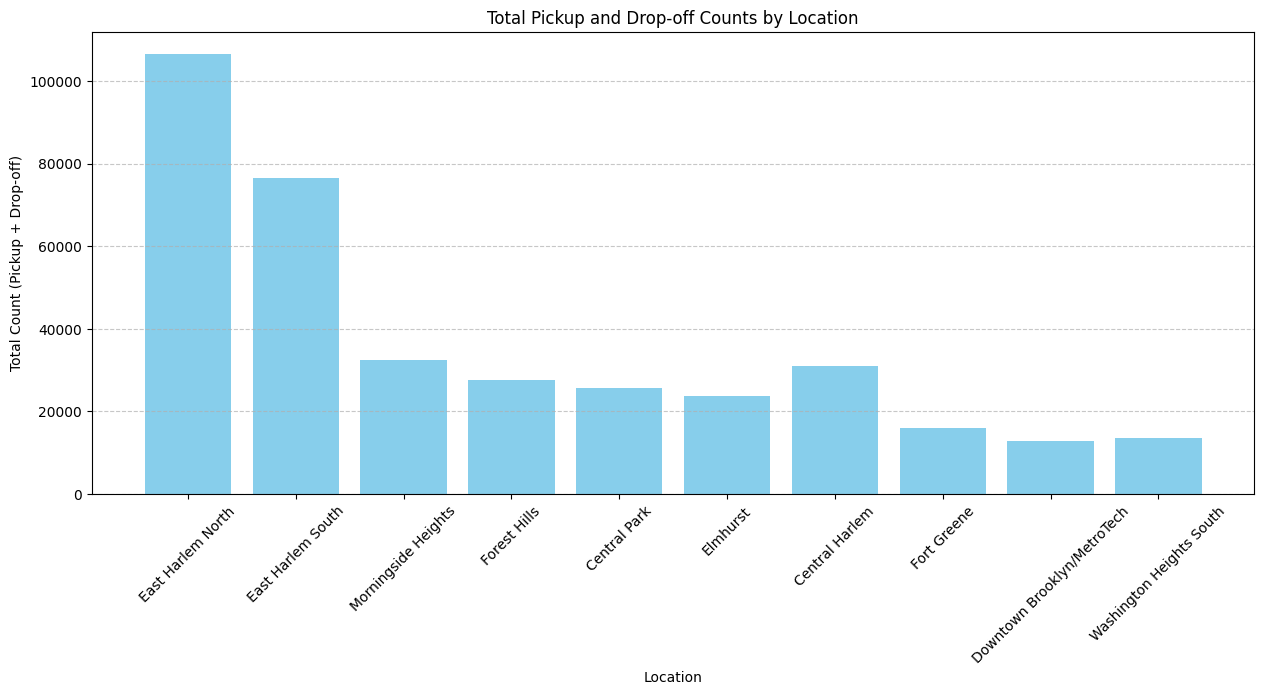

In [28]:
# Count the most common pickup locations
pickup_counts = total_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup Count']

# Count the most common drop-off locations
dropoff_counts = total_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Drop-off Count']

# Merge the two counts to see both pickup and drop-off together
combined_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
combined_counts = combined_counts.sort_values(['Pickup Count', 'Drop-off Count'], ascending=[False, False]).head(10)
combined_counts_with_location = pd.merge(combined_counts, service_zones, on='LocationID', how='left').fillna('').drop(columns=['LocationID', 'Borough', 'service_zone'])
print(combined_counts_with_location)

# Combine pickup and drop-off counts for plotting
combined_counts_with_location['Total Count'] = combined_counts_with_location['Pickup Count'] + combined_counts_with_location['Drop-off Count']

# Plotting the combined counts
plt.figure(figsize=(15, 6))
plt.bar(combined_counts_with_location['Zone'].astype(str), combined_counts_with_location['Total Count'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Total Count (Pickup + Drop-off)')
plt.title('Top Pickup and Drop-off Counts by Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### 3. What is the distribution of the number of passengers per trip

   Passenger Count  Frequency
0              1.0     313774
1              2.0      36279
2              5.0       9221
3              6.0       6820
4              3.0       4082
5              0.0       3628
6              4.0       1945
7              9.0         30
8              8.0         21
9              7.0         16


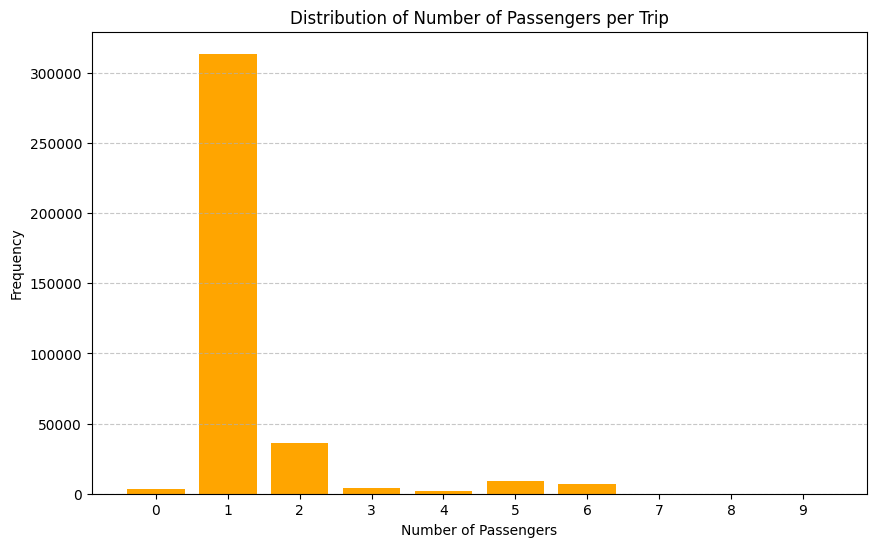

In [29]:
passenger_distribution = total_df['passenger_count'].value_counts().reset_index()
passenger_distribution.columns = ['Passenger Count', 'Frequency']

print(passenger_distribution)

plt.figure(figsize=(10, 6))
plt.bar(passenger_distribution['Passenger Count'], passenger_distribution['Frequency'], color='orange')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Passengers per Trip')
plt.xticks(passenger_distribution['Passenger Count'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. What is the average fare amount per trip, and how does it vary by trip distance

17.85


C:\Users\sunsh\AppData\Local\Temp\ipykernel_10916\388880422.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_by_distance = total_df.groupby('Distance Category')['fare_amount'].mean().reset_index()


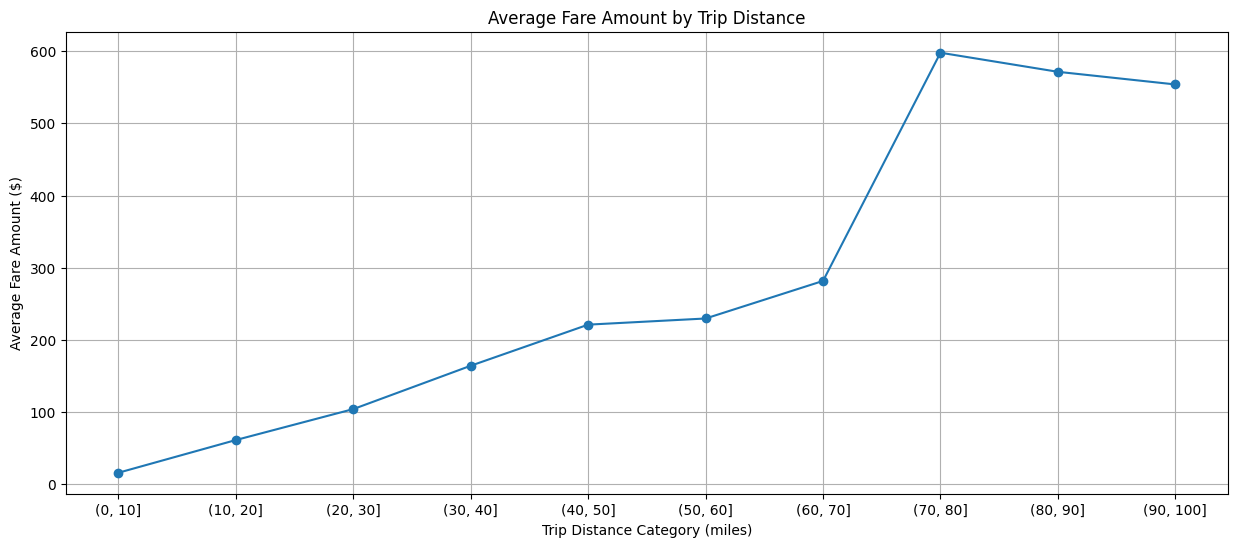

In [34]:
average_fare = total_df['fare_amount'].mean()
print(average_fare.round(2))

# Calculate the average fare amount per trip distance category
distance_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
total_df['Distance Category'] = pd.cut(total_df['trip_distance'], bins=distance_bins)

# Calculate average fare by distance category
average_fare_by_distance = total_df.groupby('Distance Category')['fare_amount'].mean().reset_index()

# Plotting the average fare amount by trip distance
plt.figure(figsize=(15, 6))
plt.plot(average_fare_by_distance['Distance Category'].astype(str), average_fare_by_distance['fare_amount'], marker='o', linestyle='-')
plt.xlabel('Trip Distance Category (miles)')
plt.ylabel('Average Fare Amount ($)')
plt.title('Average Fare Amount by Trip Distance')
plt.grid(True)
plt.show()

### 5. What are the peak hours for pickups and drop-offs

    Pickup Count  Dropoff Count
0           7031           8024
1           5071           5356
2           3683           3881
3           2803           2929
4           2416           2497
5           2410           2260
6           5919           4583
7          14115          12444
8          18469          17194
9          20624          20783
10         20431          20431
11         20454          19813
12         21351          21519
13         21582          21145
14         25096          24158
15         27234          26707
16         29525          29047
17         31325          31366
18         30405          31505
19         23913          25528
20         18148          19103
21         16004          16354
22         13288          13866
23         10347          11151


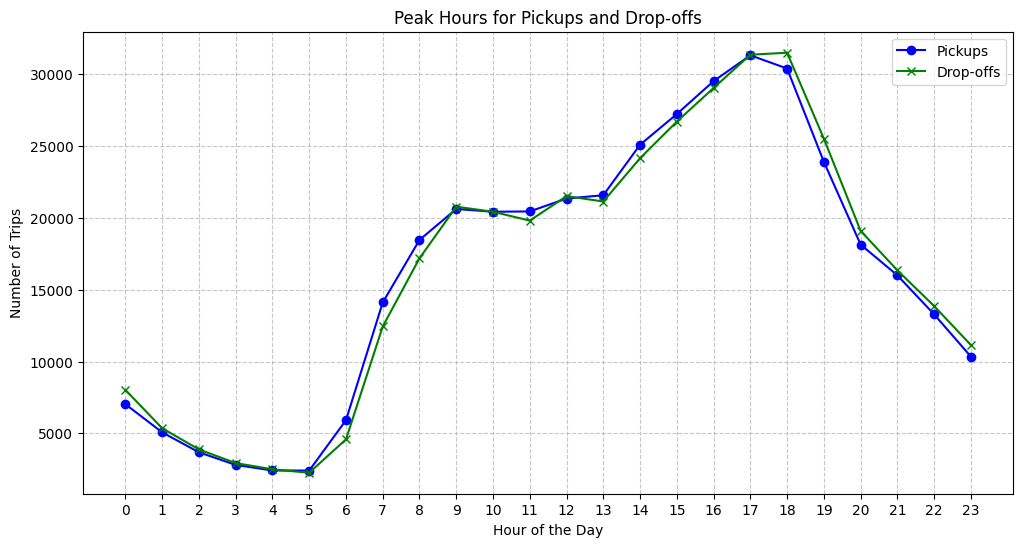

In [37]:
# Count pickups and drop-offs per hour
pickup_counts = total_df['lpep_pickup_datetime'].dt.hour.value_counts().sort_index()
dropoff_counts = total_df['lpep_dropoff_datetime'].dt.hour.value_counts().sort_index()
pickup_dropoff_counts = pd.concat([pickup_counts, dropoff_counts], axis=1)
pickup_dropoff_counts.columns = ['Pickup Count', 'Dropoff Count']
print(pickup_dropoff_counts)

# Plotting the peak hours for pickups and drop-offs
plt.figure(figsize=(12, 6))
plt.plot(pickup_counts.index, pickup_counts, marker='o', linestyle='-', label='Pickups', color='blue')
plt.plot(dropoff_counts.index, dropoff_counts, marker='x', linestyle='-', label='Drop-offs', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Peak Hours for Pickups and Drop-offs')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### 6. What is the percentage of each payment type for the trips

  Payment Type   Count  Percentage
0         Cash  106698       28.39
1  Credit Card  265385       70.62
2       Others    3733        0.99


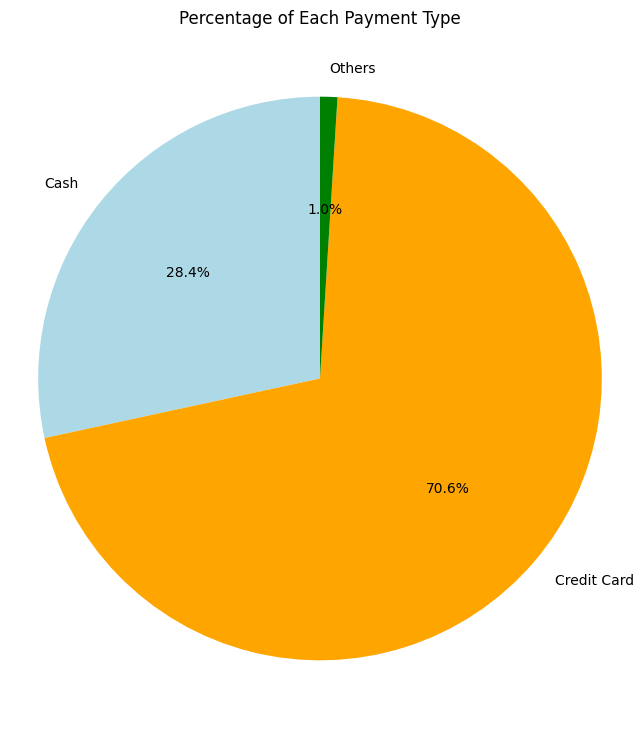

In [62]:
# Count the frequency of each payment type
payment_counts = total_df['payment_type'].value_counts().reset_index()
payment_type_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'Others', 4: 'Others', 5: 'Others', 6: 'Others'}
payment_counts['payment_type'] = payment_counts['payment_type'].map(payment_type_mapping)

new_payment_counts = payment_counts.groupby('payment_type', as_index=False)['count'].sum()
new_payment_counts.columns = ['Payment Type', 'Count']

# Calculate percentage of each payment type
new_payment_counts['Percentage'] = round((new_payment_counts['Count'] / new_payment_counts['Count'].sum()) * 100, 2)
print(new_payment_counts)

# Plotting the percentage of each payment type
plt.figure(figsize=(8, 9))
plt.pie(new_payment_counts['Percentage'], labels=new_payment_counts['Payment Type'], autopct='%1.1f%%', colors=['lightblue', 'orange', 'green'], startangle=90)
plt.title('Percentage of Each Payment Type')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

### 7. What is the impact of the congestion surcharge on the total fare amount

                      Condition  Average Total Amount
0     With Congestion Surcharge             28.939323
1  Without Congestion Surcharge             20.979793


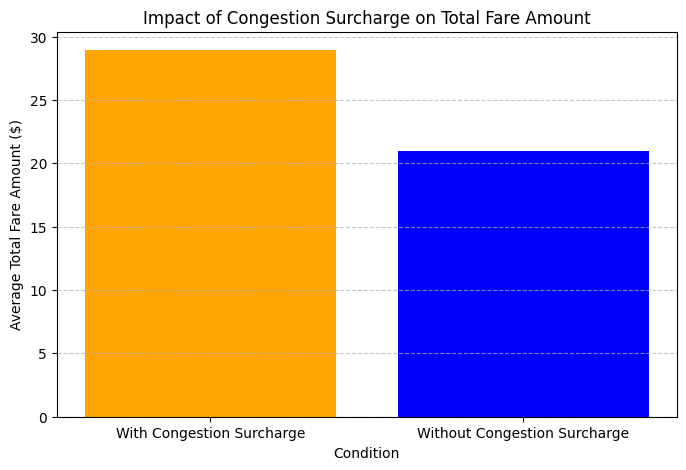

In [38]:
# Separate trips with and without congestion surcharge
surcharge_applied = total_df[total_df['congestion_surcharge'] > 0]
surcharge_not_applied = total_df[total_df['congestion_surcharge'] == 0]

# Calculate average total amount for both groups
average_with_surcharge = surcharge_applied['total_amount'].mean()
average_without_surcharge = surcharge_not_applied['total_amount'].mean()

# Display the results in a table format
impact_df = pd.DataFrame({
    'Condition': ['With Congestion Surcharge', 'Without Congestion Surcharge'],
    'Average Total Amount': [average_with_surcharge, average_without_surcharge]
})
print(impact_df)

# Plotting the impact of congestion surcharge on total fare amount
plt.figure(figsize=(8, 5))
plt.bar(impact_df['Condition'], impact_df['Average Total Amount'], color=['orange', 'blue'])
plt.xlabel('Condition')
plt.ylabel('Average Total Fare Amount ($)')
plt.title('Impact of Congestion Surcharge on Total Fare Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 8. What percentage of trips include additional charges like tolls or extra fees

   Total Trips  Trips with Additional Charges  Percentage with Charges
0       391644                         173500                44.300436


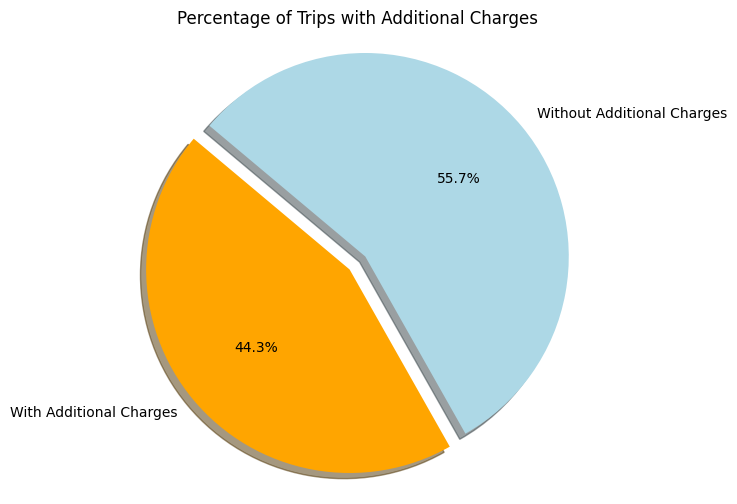

In [39]:
# Identify trips with additional charges
total_df['has_additional_charges'] = (total_df['tolls_amount'] > 0) | (total_df['extra'] > 0)

# Calculate the percentage of trips with additional charges
total_trips = len(total_df)
trips_with_charges = total_df['has_additional_charges'].sum()
percentage_with_charges = (trips_with_charges / total_trips) * 100

# Display the results in a table
result_df = pd.DataFrame({
    'Total Trips': [total_trips],
    'Trips with Additional Charges': [trips_with_charges],
    'Percentage with Charges': [percentage_with_charges]
})

print(result_df)

# Plotting a pie chart to show the percentage of trips with and without additional charges
labels = ['With Additional Charges', 'Without Additional Charges']
sizes = [trips_with_charges, total_trips - trips_with_charges]
colors = ['orange', 'lightblue']
explode = (0.1, 0)  # explode the slice with additional charges

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Trips with Additional Charges')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

### 9. How does the total trip amount vary across different trip types

     trip_type  total_amount
0  Street-Hail     22.517671
1     Dispatch     41.617787


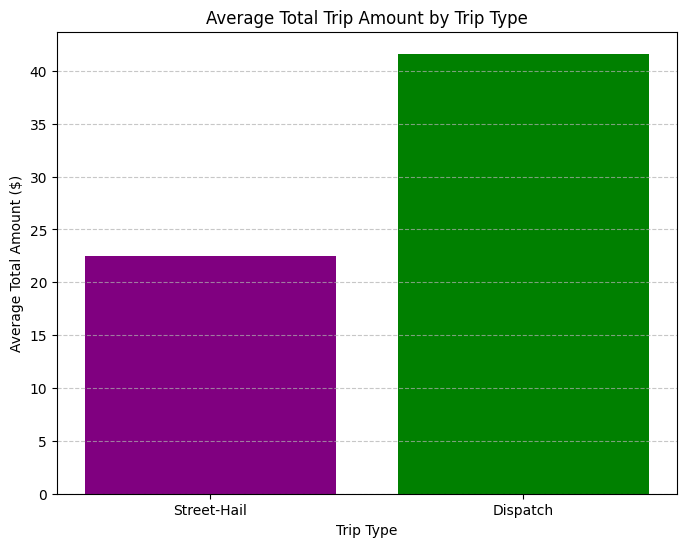

In [40]:
# Calculate the average total amount by trip type
average_amount_by_trip_type = total_df.groupby('trip_type')['total_amount'].mean().reset_index()
average_amount_by_trip_type['trip_type'] = average_amount_by_trip_type['trip_type'].map({1: 'Street-Hail', 2: 'Dispatch'})

print(average_amount_by_trip_type)

# Plotting the variation of total trip amount by trip type
plt.figure(figsize=(8, 6))
plt.bar(average_amount_by_trip_type['trip_type'], average_amount_by_trip_type['total_amount'], color=['purple', 'green'])
plt.xlabel('Trip Type')
plt.ylabel('Average Total Amount ($)')
plt.title('Average Total Trip Amount by Trip Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 10. What is the relationship between trip duration and trip distance

C:\Users\sunsh\AppData\Local\Temp\ipykernel_10916\3347762774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['trip_duration_min'] = (valid_df['lpep_dropoff_datetime'] - valid_df['lpep_pickup_datetime']).dt.total_seconds() / 60


0.1


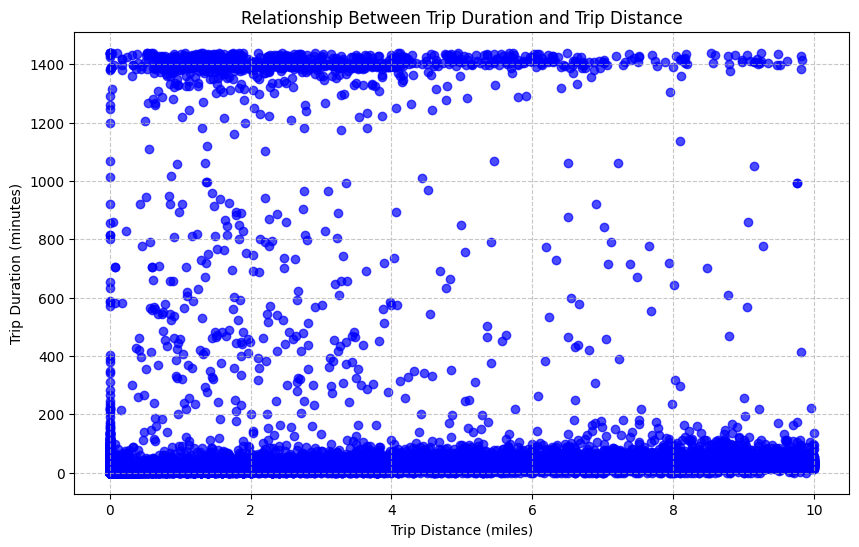

In [44]:
# Only trips within 10 miles are counted
valid_df = total_df[total_df['trip_distance'] <= 10]

# Calculate trip duration in minutes
valid_df['trip_duration_min'] = (valid_df['lpep_dropoff_datetime'] - valid_df['lpep_pickup_datetime']).dt.total_seconds() / 60

correlation = valid_df['trip_duration_min'].corr(valid_df['trip_distance'])
print(correlation.round(2))

# Scatter plot to show the relationship between trip duration and trip distance
plt.figure(figsize=(10, 6))
plt.scatter(valid_df['trip_distance'], valid_df['trip_duration_min'], color='blue', alpha=0.7)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Relationship Between Trip Duration and Trip Distance')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()